# Projet 7 : Implémentez un modèle de scoring


Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.
 
 

L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement. 

Les données
Voici les données dont vous aurez besoin pour réaliser le dashboard. Pour plus de simplicité, vous pouvez les télécharger à cette adresse.

Vous aurez sûrement besoin de joindre les différentes tables entre elles.

Votre mission : 
- Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
- Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.
- Mettre en production le modèle de scoring de prédiction à l’aide d’une API, ainsi que le dashboard interactif qui appelle l’API pour les prédictions.


Michaël, votre manager, vous incite à sélectionner un ou des kernels Kaggle pour vous faciliter l’analyse exploratoire, la préparation des données et le feature engineering nécessaires à l’élaboration du modèle de scoring. Si vous le faites, vous devez analyser ce ou ces kernels et le ou les adapterpour vous assurer qu’ils répond(ent) aux besoins de votre mission.


# 

# Sommaire

## I. Importation
### 1. Importation des bibliothèques
### 2. Importation du fichier et du modèle

## II. Feature Importance
### 1. Préparation des données
### 2. Analyse sur le fichier
### 3. Analyse sur Target 1
### 4. Analyse sur Target 0

## III. Conclusion sur les 4 étapes


# 

# I. Importation

### 1. Importation des bibliothèques

# 

In [1]:
# Bibliothèques standards
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Préparation des données
from sklearn.model_selection import train_test_split
from collections import Counter

# Feature Importance
import shap


# Divers 
import warnings
warnings.filterwarnings('ignore')

C:\Users\gregm\anaconda3\envs\Python\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 

### 2. Importation du fichier et du modèle

In [2]:
# Importation du fichier

df = pd.read_csv('df_modélisation.csv')

df_sample, _ = train_test_split(df, train_size=1500, stratify=df.TARGET)

print('df', Counter(df.TARGET))
print('df_sample', Counter(df_sample.TARGET))

df Counter({0: 282682, 1: 24824})
df_sample Counter({0: 1379, 1: 121})


In [3]:
df.head(2)

,TARGET,SK_ID_CURR,POS_SK_DPD_DEF_SUM,CC_DRAWING_LIMIT_RATIO_MAX,INSTAL_PAYMENT_RATIO_MEAN,POS_REMAINING_INSTALMENTS,CC_LAST_AMT_BALANCE_MEAN,CC_PAYMENT_DIV_MIN_MIN,CC_LATE_PAYMENT_VAR,NEW_DOC_KURT,...,NONLIVINGAREA_MODE,Revenus annuels,BURO_CREDIT_TYPE_Mortgage_MEAN,APPROVED_CNT_PAYMENT_MEAN,FLAG_DOCUMENT_7,FLAG_DOCUMENT_18,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ORGANIZATION_TYPE_Construction,INSTAL_AMT_PAYMENT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MEAN
0,1,100002,0.0,0.522181,1.0,6.0,76645.791409,1.294235,0.014808,20.0,...,0.0,24700.5,0.0,24.0,0,0,40.5,0,9251.775,49156.2
1,0,100003,0.0,0.522181,1.0,1.0,76645.791409,1.294235,0.014808,20.0,...,0.0,35698.5,0.0,10.0,0,0,0.0,0,6662.970,0.0


In [4]:
# Analyse des clients avec une Target = 1

test = df_sample[df_sample['TARGET']== 1]
test

,TARGET,SK_ID_CURR,POS_SK_DPD_DEF_SUM,CC_DRAWING_LIMIT_RATIO_MAX,INSTAL_PAYMENT_RATIO_MEAN,POS_REMAINING_INSTALMENTS,CC_LAST_AMT_BALANCE_MEAN,CC_PAYMENT_DIV_MIN_MIN,CC_LATE_PAYMENT_VAR,NEW_DOC_KURT,...,NONLIVINGAREA_MODE,Revenus annuels,BURO_CREDIT_TYPE_Mortgage_MEAN,APPROVED_CNT_PAYMENT_MEAN,FLAG_DOCUMENT_7,FLAG_DOCUMENT_18,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ORGANIZATION_TYPE_Construction,INSTAL_AMT_PAYMENT_MIN,BURO_AMT_CREDIT_SUM_DEBT_MEAN
57658,1,166821,0.000000,0.584000,0.973684,0.000000,0.000000,0.000000,0.000000,20.0,...,0.027023,31261.5,0.000000,6.000000,0,0,3186.765000,0,44.460000,78451.875000
85040,1,198659,0.000000,0.522181,0.975410,23.000000,76645.791409,1.294235,0.014808,20.0,...,0.027023,33367.5,0.014232,26.000000,0,0,2529.066951,0,4.455000,160390.363993
257233,1,397680,11.000000,0.578947,1.000000,6.000000,467093.280000,0.000000,0.000000,20.0,...,0.027023,11277.0,0.000000,13.500000,0,0,3986.280000,0,0.945000,111219.170000
254867,1,394923,0.000000,0.522181,1.000000,0.000000,76645.791409,1.294235,0.014808,20.0,...,0.000000,25015.5,0.000000,12.000000,0,0,0.000000,0,14.040000,15070.500000
150124,1,274038,0.000000,0.522181,1.000000,0.000000,76645.791409,1.294235,0.014808,20.0,...,0.027023,17338.5,0.000000,12.000000,0,0,2529.066951,0,15841.665000,152649.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122733,1,242303,0.000000,0.522181,1.000000,0.000000,76645.791409,1.294235,0.014808,20.0,...,0.004900,18621.0,0.000000,9.000000,0,0,0.000000,0,9299.475000,188123.400000
176036,1,303991,17.223788,0.522181,1.073195,6.209996,76645.791409,1.294235,0.014808,0.0,...,0.027023,14467.5,0.000000,13.592889,0,0,2529.066951,0,5198.165134,0.000000
36920,1,142769,0.000000,1.000000,1.000000,0.000000,217997.450000,1.001554,0.000000,20.0,...,0.027023,30528.0,0.000000,25.000000,0,0,2529.066951,0,17.460000,59194.125000
40767,1,147214,0.000000,0.522181,1.000000,0.000000,76645.791409,1.294235,0.014808,20.0,...,0.000000,30717.0,0.000000,12.336000,0,0,2529.066951,0,7.065000,0.000000


In [5]:
# Importation du modèle

with open('model_streamlit.pkl', 'rb') as f2:
    grid_lgbm = pickle.load(f2)

# 

## II. Feature Importance

### 1. Préparation des données

In [6]:
df_sample_target = df_sample.TARGET
df_sample.drop(columns='TARGET', inplace=True)
df.drop(columns='TARGET', inplace=True)

# 

### 2. Analyse sur le fichier

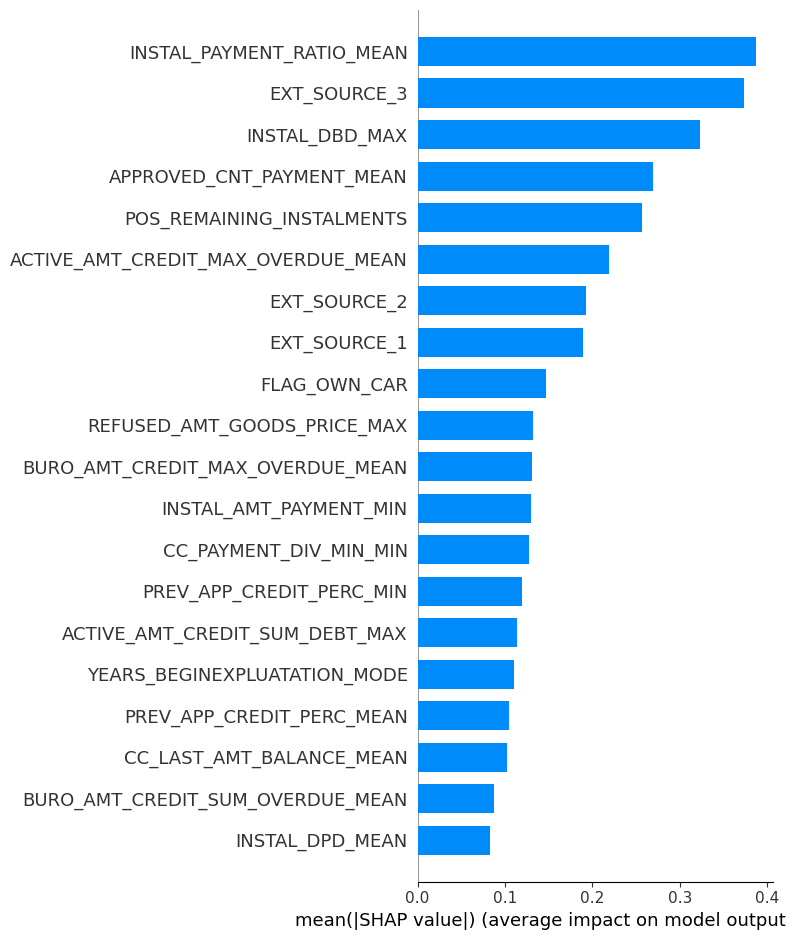

In [7]:
# Feature importance
explainer_shap = shap.TreeExplainer(grid_lgbm)

shap_values_lgb = explainer_shap.shap_values(df_sample)
shap_values_lgb_df = explainer_shap.shap_values(df)

shap.summary_plot(shap_values_lgb[1], df, plot_type="bar")

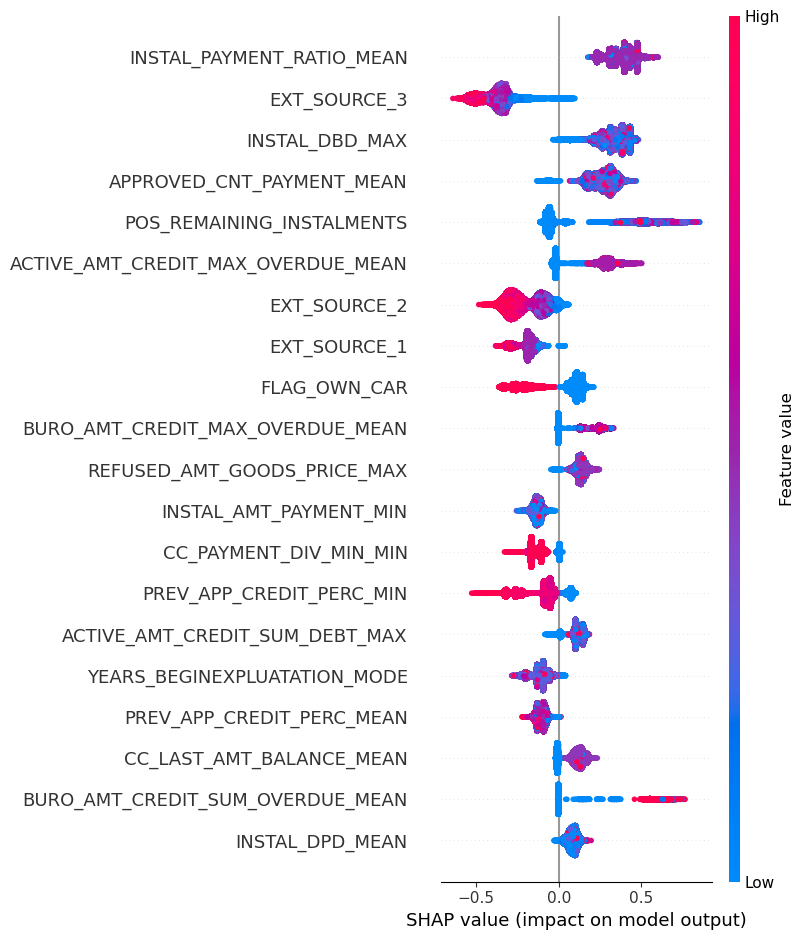

In [8]:
f = plt.figure()
shap.summary_plot(shap_values_lgb_df[1], df)
f.savefig("summary_plot_lgbm.png", bbox_inches='tight', dpi=150)

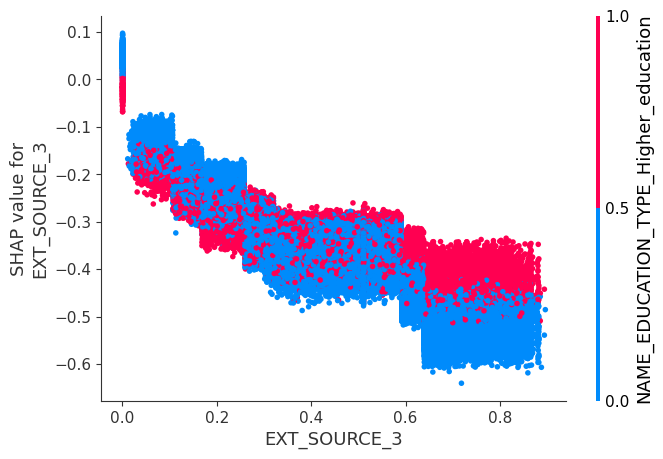

In [9]:
import shap
# make plot.
shap.dependence_plot('EXT_SOURCE_3', shap_values_lgb_df[1], df)

### 3. Analyse pour TARGET = 1

In [10]:
index1500 = [i for i in range(0,1500)]

In [11]:
df_sample.index = index1500
df_sample_target.index = index1500

In [12]:
pd.DataFrame(shap_values_lgb[1]).to_csv('feature_importance.csv')

In [13]:
d_feats = pd.read_csv('feature_importance.csv', index_col=0)

In [16]:
selected_rows = df_sample[df_sample.SK_ID_CURR == 397680]
if not selected_rows.empty:
    i = selected_rows.index.values[0]
    print(i)
    shap.initjs()
else:
    print("Aucune ligne ne correspond à la condition donnée")

31


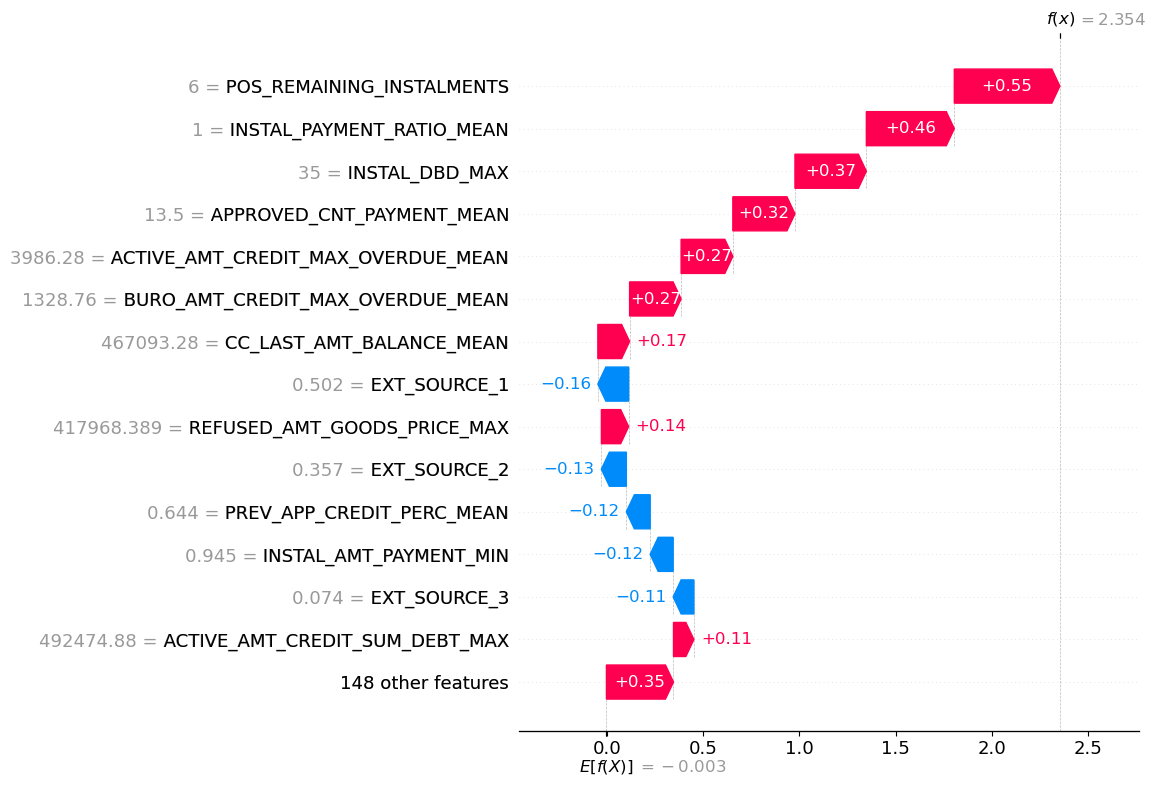

In [17]:
class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        self.display_data = data # New attribute
        
shap_object = ShapObject(base_values = explainer_shap.expected_value[1],
                         values = d_feats.loc[i].values,
                         feature_names = df_sample.columns,
                         data = df_sample.iloc[i,:])

shap.waterfall_plot(shap_object, max_display=15)

In [18]:
df_shap = pd.DataFrame(shap_object.values,shap_object.feature_names)

In [19]:
df_shap.columns = ["shap_values"]

In [20]:
df_shap['shap_abs'] = df_shap['shap_values'].apply(np.abs)


In [21]:
df_shap.sort_values(by='shap_abs', ascending=False).head(10)

,shap_values,shap_abs
POS_REMAINING_INSTALMENTS,0.548554,0.548554
INSTAL_PAYMENT_RATIO_MEAN,0.457069,0.457069
INSTAL_DBD_MAX,0.371042,0.371042
APPROVED_CNT_PAYMENT_MEAN,0.322872,0.322872
ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,0.268955,0.268955
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN,0.267550,0.267550
CC_LAST_AMT_BALANCE_MEAN,0.165071,0.165071
EXT_SOURCE_1,-0.160154,0.160154
REFUSED_AMT_GOODS_PRICE_MAX,0.141730,0.141730
EXT_SOURCE_2,-0.129720,0.129720


### 4. Analyse pour TARGET = 0

In [24]:
i=10

shap.initjs()
shap.force_plot(explainer_shap.expected_value[1], shap_values_lgb[1][i], df_sample.iloc[i,:])

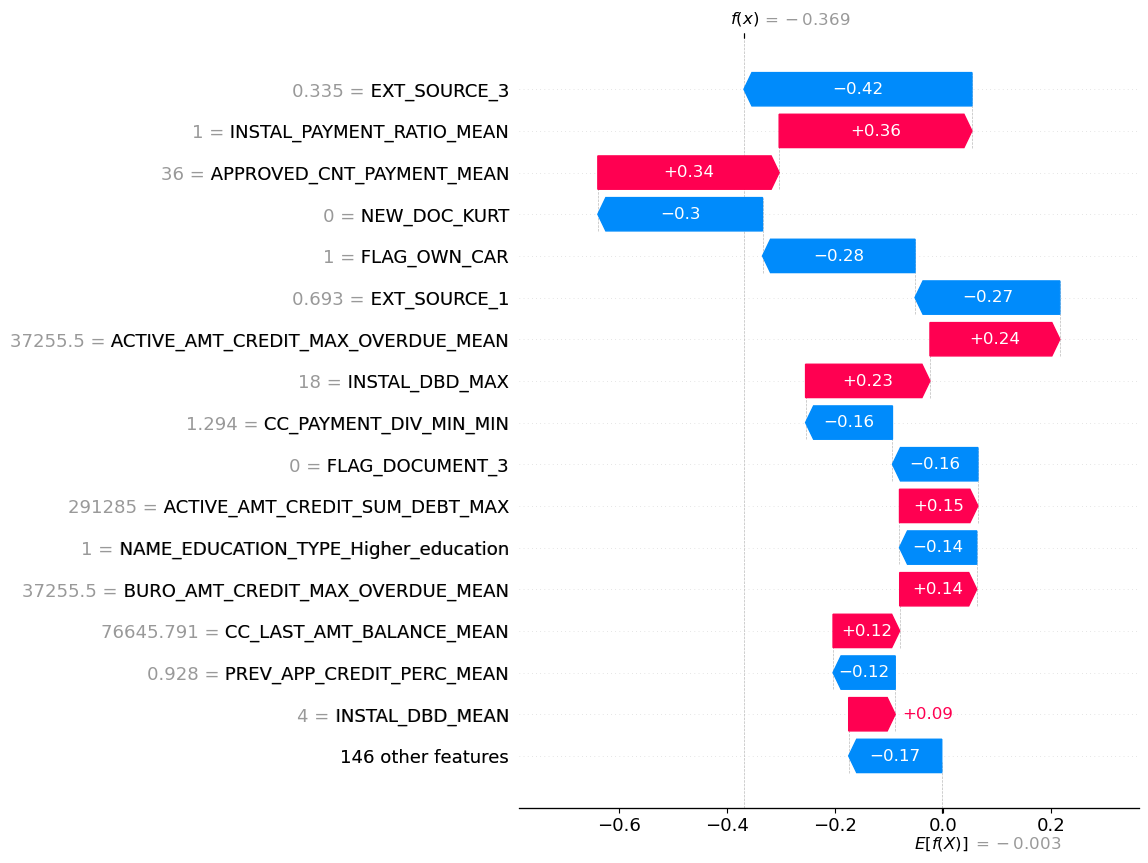

In [25]:
class ShapObject:
    
    def __init__(self, base_values, data, values, feature_names):
        self.base_values = base_values # Single value
        self.data = data # Raw feature values for 1 row of data
        self.values = values # SHAP values for the same row of data
        self.feature_names = feature_names # Column names
        self.display_data = data # New attribute
        
shap_object = ShapObject(base_values = explainer_shap.expected_value[1],
                         values = shap_values_lgb[1][i],
                         feature_names = df_sample.columns,
                         data = df_sample.iloc[i,:])

shap.waterfall_plot(shap_object, max_display=17)

# 

## III. Conclusion sur les 4 parties

En conclusion, nous pouvons indiquer que nous avons réussi à répondre à la problématique d'implémentation du scoring, ce projet a pu être mené grâce à un ensemble d'étapes.

La première étape étant l'analyse exploratoire de l'ensemble de nos données. Cette analyse nous a permis de ressortir un déséquilibre important pour notre Target avec une faible présence de clients avec un défaut, ce qui reste rassurant pour la société.
Ce déséquilibre est un élément clé de notre projet car il sera essentiel de procéder au traitement de cet élément du jeu de donnée.
Notre analyse exploratoire va aboutir sur le feature engineering. Comme cela a été évoqué dans le projet, nous avons pris la décision d'utiliser de nombreux travaux présent sur le site Kaggle. Cela nous a permis de ressortir une méthodologie avec la création, l'agrégation puis une sélection des variables après avoir regroupé nos différents jeux de données.

Après avoir procédé à cette première étape, nous avons démarré la phase de modélisation. Ce projet correspond à une classification de classe, nous avons procédé en amont à une sélection de certains modèles en rapport avec notre problématique. Nous avons arrêté notre choix à 5 modèle parmi lesquelles la Régression Logistique, le Dummy Classifier ou encore le LightGBM.
Notre première phase d'entrainement des modèles a confirmé notre hypothèse concernant ce déséquilibre des données.
Nous avons ainsi procédé à une gestion à travers plusieurs techniques comme le RandomUnderSample.
L'utilisation de ces différents systèmes de gestion ont permis une très forte amélioration de nos résultats.
Après cette gestion, nous avons pu procéder à une optimisation de nos modèles puis à l'entrainement et la sélection de notre meileur modèle. Ce dernier sera utilisé dans une seconde phase du projet, à savoir le tableau de bord et l'API sous Flask.

Notre troisième étape sera également la mise en place d'une modélisation mais cette fois à travers l'utilisation d'un modèle du KNN. Le but de ce dernier est tout simplement de répondre à une hypothèse, à savoir la capacité de notre modèle a obtenir une proximité des clients à travers ces différentes données. Cette étape de modélisation est effectuée afin de pouvoir répondre à cette hypothèse. 

Notre quatrième étape sera tout simplement l'analyse de nos résultats à travers l'importance des différentes variables. Notre principal constat est la présence de certaines variables avec une forte valeur ajoutée pour nos modèles et peu importe la nature de la classe de nos clients. Cette phase nous a permis de remarquer que chaque variable a bien une analyse spécifique et que chaque classe fonctionne de manière différente.

Enfin, nous pouvons constater que dans notre modélisation, il est dommage que certaines données fondamentales pour les banques ne soient pas présentes car cela aurait pu aboutir à une forte amélioration de notre phase de modélisation.
Parmi ces différentes données, nous pouvons notamment prendre en considération certains éléments liés à la clientèle (présence d'une épargne montant sur le compte courant, pour les banques comme l'utilisation d'une cotation bancaire qui est désormais une pratique très utilisée parmi les établissements. La nature du prêt et certains éléments auraient pu apporter une meilleure analyse tels que les garanties sur les prêts ou sa nature (amortissement, in fine, ...).

Toutefois, nous avons réussi à répondre à l'ensemble de la problématique et que l'ensemble de ces informations seront désormais utilisées pour notre tableau de bord mais également pour notre API.